In [13]:
from pathlib import Path
path = Path('/home/alilavaee/Desktop/PlantifyDr/PlantDiseasesDataset')

In [14]:
# Download dataset with Kaggle API
# ! kaggle datasets download lavaman151/plantifydr-dataset --unzip

In [15]:
from fastai.vision.all import *

In [16]:
path.ls()

(#10) [Path('/home/alilavaee/Desktop/PlantifyDr/PlantDiseasesDataset/Bell pepper'),Path('/home/alilavaee/Desktop/PlantifyDr/PlantDiseasesDataset/Corn'),Path('/home/alilavaee/Desktop/PlantifyDr/PlantDiseasesDataset/Grape'),Path('/home/alilavaee/Desktop/PlantifyDr/PlantDiseasesDataset/Strawberry'),Path('/home/alilavaee/Desktop/PlantifyDr/PlantDiseasesDataset/Citrus'),Path('/home/alilavaee/Desktop/PlantifyDr/PlantDiseasesDataset/Tomato'),Path('/home/alilavaee/Desktop/PlantifyDr/PlantDiseasesDataset/Cherry'),Path('/home/alilavaee/Desktop/PlantifyDr/PlantDiseasesDataset/Peach'),Path('/home/alilavaee/Desktop/PlantifyDr/PlantDiseasesDataset/Potato'),Path('/home/alilavaee/Desktop/PlantifyDr/PlantDiseasesDataset/Apple')]

In [17]:
plant_list = ['Apple','Bell pepper','Cherry','Citrus','Corn','Grape','Peach','Potato','Strawberry','Tomato']
plant = 'Tomato'

In [18]:
model_path = Path(path/plant)

In [19]:
batch_tfms=[Normalize.from_stats(*imagenet_stats)]

In [20]:
dls = ImageDataLoaders.from_folder(path/plant,train='train',valid_pct=0.2,seed=1000,item_tfms=Resize(224),
                                   batch_tfms=batch_tfms,bs=128)

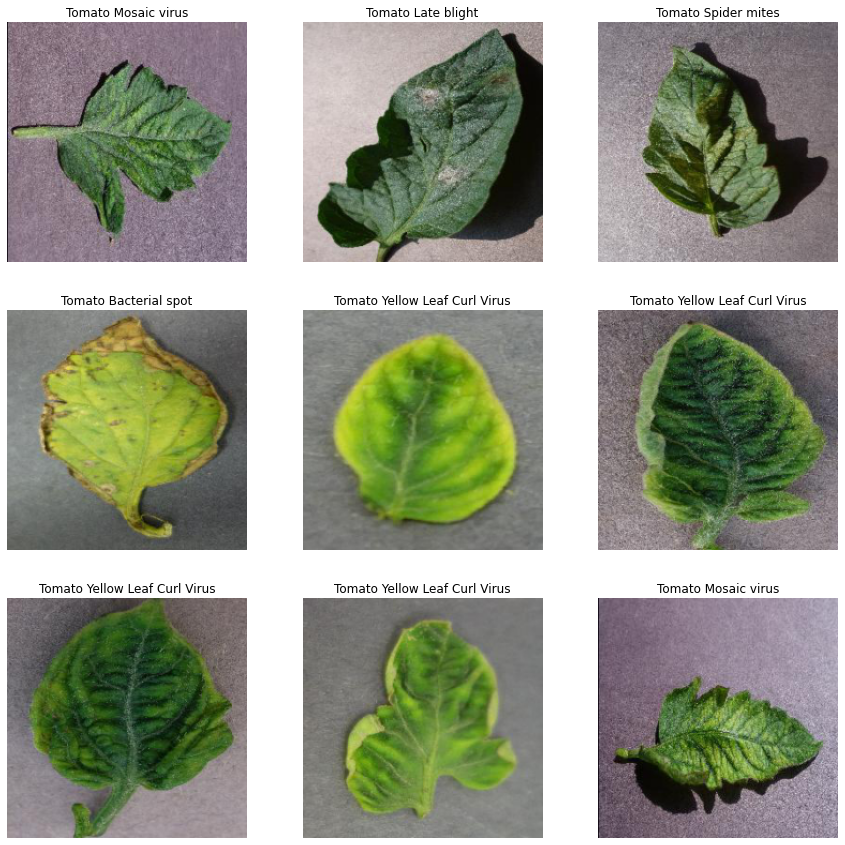

In [9]:
dls.show_batch(figsize=(15,15))

In [10]:
f1 = F1Score(average='weighted')
mcc = MatthewsCorrCoef()

In [11]:
learn = cnn_learner(dls, models.resnet50,loss_func=LabelSmoothingCrossEntropy(),metrics=[accuracy,f1,mcc],
                    cbs=[SaveModelCallback(monitor='accuracy'),EarlyStoppingCallback(monitor='accuracy',patience=2)
                         ,ShowGraphCallback()],model_dir=model_path/'models').to_fp16()

epoch,train_loss,valid_loss,accuracy,f1_score,matthews_corrcoef,time
0,1.187443,0.858743,0.915074,0.914951,0.904563,01:47
1,0.882371,0.712237,0.968586,0.968547,0.964671,01:44
2,0.713777,0.618893,0.981486,0.981474,0.979188,01:43
3,0.619556,0.578204,0.985547,0.985536,0.983756,01:43
4,0.584123,0.556617,0.988294,0.988292,0.986836,01:43
5,0.566390,0.548280,0.990564,0.990561,0.989394,01:44
6,0.555052,0.541174,0.990683,0.990685,0.989521,01:44
7,0.546018,0.538733,0.990205,0.990200,0.988995,01:45
8,0.539862,0.533835,0.991519,0.991515,0.990461,01:46
9,0.534212,0.533519,0.991519,0.991521,0.990464,01:43


Better model found at epoch 0 with accuracy value: 0.9150740504264832.


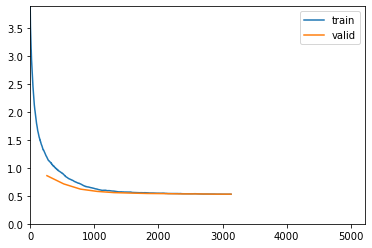

Better model found at epoch 1 with accuracy value: 0.9685857892036438.
Better model found at epoch 2 with accuracy value: 0.981485903263092.
Better model found at epoch 3 with accuracy value: 0.9855470657348633.
Better model found at epoch 4 with accuracy value: 0.9882943034172058.
Better model found at epoch 5 with accuracy value: 0.9905638098716736.
Better model found at epoch 6 with accuracy value: 0.9906832575798035.
Better model found at epoch 8 with accuracy value: 0.9915193319320679.
Better model found at epoch 10 with accuracy value: 0.992355465888977.
No improvement since epoch 10: early stopping


In [12]:
learn.fit_one_cycle(20)

In [14]:
learn = learn.to_fp32()

In [15]:
learn.save(model_path/f'models/{plant}')

Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Tomato/models/Tomato.pth')

In [21]:
learn = cnn_learner(dls, models.resnet50).load(model_path/f'models/{plant}')

In [13]:
learn.summary()

Sequential (Input shape: 128)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 64 x 112 x 11 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     128 x 256 x 56 x 56 
Conv2d                                    16384      False     
BatchNorm2d                               512        True      
ReLU                                                           
_________________________________________

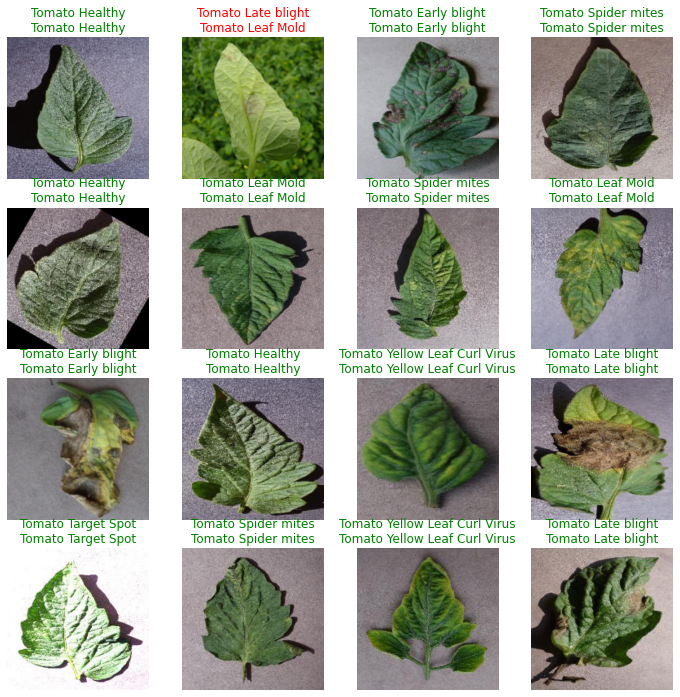

In [14]:
learn.show_results(max_n=16)

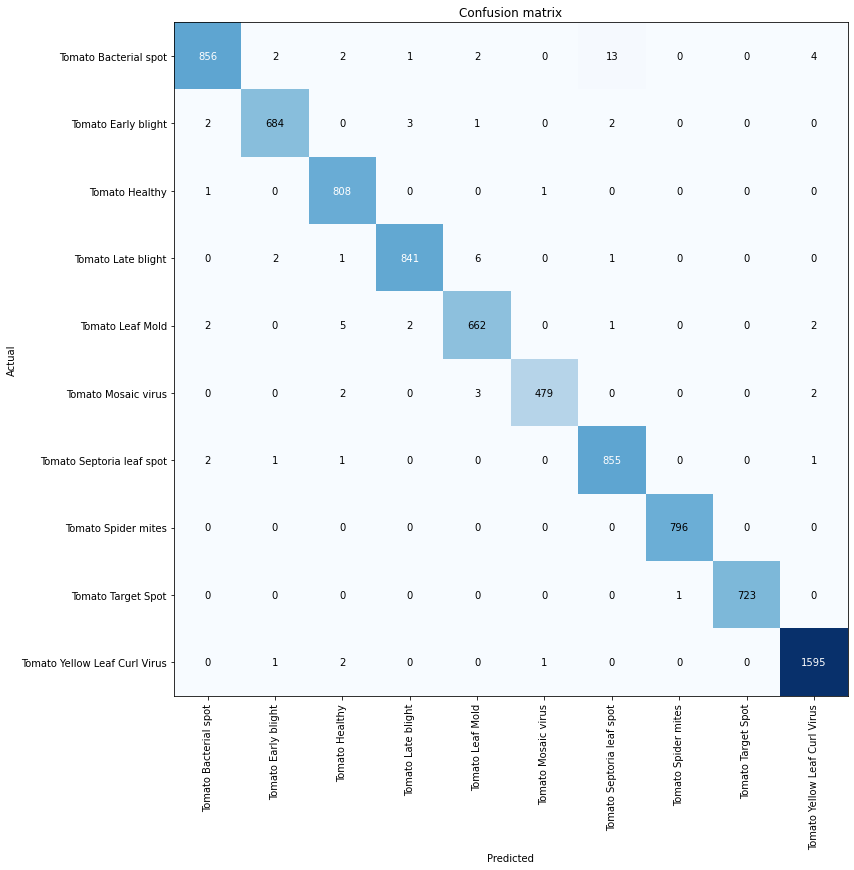

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(12,12))

In [16]:
learn.export(f'{plant}.pkl')